# **Processo de descoberta de conhecimento em base de dados**
# (Knowledge Discovery in Databases - **KDD**)

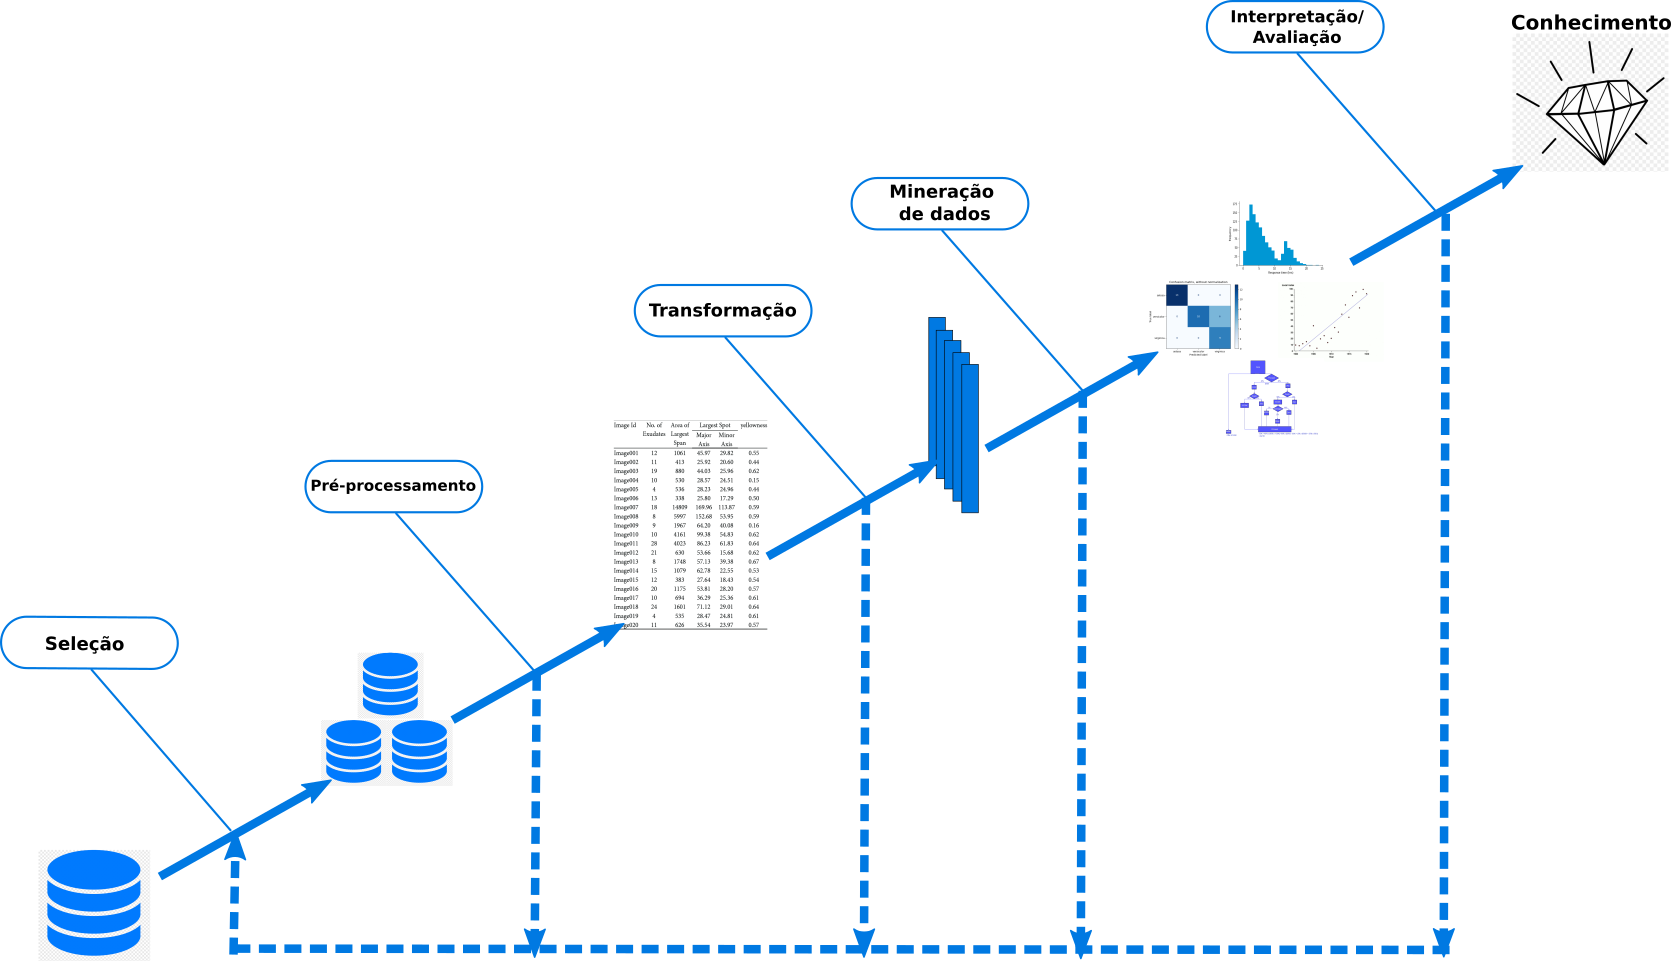

# Importar bibliotecas necessárias para execução do KDD

In [34]:
# Bibliotecas processamento
import pandas as pd
import numpy as np


# Bibliotecas aprendizado
from sklearn.linear_model import LogisticRegression

# Bibliotecas validacao
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Seleção do conjunto de dados

In [23]:
# Importar conjunto de dados (Kobe Bryant Shot Selection)
df = pd.read_csv("data.csv")

# Organizando conjunto de dados: Transferindo shot_made_flag para a ultima coluna
# e transferir shot_id para a primeira. O atributo shot_id que vamos usar no momento do deploy
colunas = df.columns.tolist()
colunas.remove("shot_made_flag")
colunas.remove("shot_id")
colunas = ["shot_id"] + colunas + ["shot_made_flag"]

# Exibindo a nova formatacao do conjunto de dados
df = df[colunas]
df.head()

,shot_id,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_made_flag
0,1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,NaN
1,2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,0.0
2,3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1.0
3,4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,0.0
4,5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1.0


# Pré-processamento

Etapa especial para tarefas como:
* Limpeza dos dados
* Remoção de dados incompletos
* Remoção de dados inconsistentes ou redundantes

In [ ]:
# No meu exemplo, nao fiz nenhum pre-processamento


# Transformação

Tarefas que podem ser executadas nesta etapa:
* Transformação de atributos nominais em numéricos
* One-hot encoding
* Transformação de atributos numéricos em nomimais
* Normalização de atributos numéricos

In [17]:
# Neste exemplo, vou selecionar a variavel action_type para utilizar na tarefa de aprendizado
# Vou transforma-la utilizando one-hot encoding. Voces podem aplicar outras transformacoes que
# acreditarem ser necessarias

dfTransformado = pd.get_dummies(df['action_type'])
dfTransformado["shot_made_flag"] = df["shot_made_flag"]

dfTransformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Alley Oop Dunk Shot                 30697 non-null  uint8  
 1   Alley Oop Layup shot                30697 non-null  uint8  
 2   Cutting Finger Roll Layup Shot      30697 non-null  uint8  
 3   Cutting Layup Shot                  30697 non-null  uint8  
 4   Driving Bank shot                   30697 non-null  uint8  
 5   Driving Dunk Shot                   30697 non-null  uint8  
 6   Driving Finger Roll Layup Shot      30697 non-null  uint8  
 7   Driving Finger Roll Shot            30697 non-null  uint8  
 8   Driving Floating Bank Jump Shot     30697 non-null  uint8  
 9   Driving Floating Jump Shot          30697 non-null  uint8  
 10  Driving Hook Shot                   30697 non-null  uint8  
 11  Driving Jump shot                   30697

In [18]:
# Definir o que eh treinamento e o que eh teste
dfTreino = dfTransformado[dfTransformado["shot_made_flag"].notnull()] # Linhas onde shot_made_flag != NaN
dfTeste  = dfTransformado[dfTransformado["shot_made_flag"].isnull()] # Linhas onde shot_made_flag == NaN

In [19]:
dfTreino.head()

,Alley Oop Dunk Shot,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,Driving Bank shot,Driving Dunk Shot,Driving Finger Roll Layup Shot,Driving Finger Roll Shot,Driving Floating Bank Jump Shot,Driving Floating Jump Shot,Driving Hook Shot,Driving Jump shot,Driving Layup Shot,Driving Reverse Layup Shot,Driving Slam Dunk Shot,Dunk Shot,Fadeaway Bank shot,Fadeaway Jump Shot,Finger Roll Layup Shot,Finger Roll Shot,Floating Jump shot,Follow Up Dunk Shot,Hook Bank Shot,Hook Shot,Jump Bank Shot,Jump Hook Shot,Jump Shot,Layup Shot,Pullup Bank shot,Pullup Jump shot,Putback Dunk Shot,Putback Layup Shot,Putback Slam Dunk Shot,Reverse Dunk Shot,Reverse Layup Shot,Reverse Slam Dunk Shot,Running Bank shot,Running Dunk Shot,Running Finger Roll Layup Shot,Running Finger Roll Shot,Running Hook Shot,Running Jump Shot,Running Layup Shot,Running Pull-Up Jump Shot,Running Reverse Layup Shot,Running Slam Dunk Shot,Running Tip Shot,Slam Dunk Shot,Step Back Jump shot,Tip Layup Shot,Tip Shot,Turnaround Bank shot,Turnaround Fadeaway Bank Jump Shot,Turnaround Fadeaway shot,Turnaround Finger Roll Shot,Turnaround Hook Shot,Turnaround Jump Shot,shot_made_flag
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [20]:
dfTeste.head()

,Alley Oop Dunk Shot,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,Driving Bank shot,Driving Dunk Shot,Driving Finger Roll Layup Shot,Driving Finger Roll Shot,Driving Floating Bank Jump Shot,Driving Floating Jump Shot,Driving Hook Shot,Driving Jump shot,Driving Layup Shot,Driving Reverse Layup Shot,Driving Slam Dunk Shot,Dunk Shot,Fadeaway Bank shot,Fadeaway Jump Shot,Finger Roll Layup Shot,Finger Roll Shot,Floating Jump shot,Follow Up Dunk Shot,Hook Bank Shot,Hook Shot,Jump Bank Shot,Jump Hook Shot,Jump Shot,Layup Shot,Pullup Bank shot,Pullup Jump shot,Putback Dunk Shot,Putback Layup Shot,Putback Slam Dunk Shot,Reverse Dunk Shot,Reverse Layup Shot,Reverse Slam Dunk Shot,Running Bank shot,Running Dunk Shot,Running Finger Roll Layup Shot,Running Finger Roll Shot,Running Hook Shot,Running Jump Shot,Running Layup Shot,Running Pull-Up Jump Shot,Running Reverse Layup Shot,Running Slam Dunk Shot,Running Tip Shot,Slam Dunk Shot,Step Back Jump shot,Tip Layup Shot,Tip Shot,Turnaround Bank shot,Turnaround Fadeaway Bank Jump Shot,Turnaround Fadeaway shot,Turnaround Finger Roll Shot,Turnaround Hook Shot,Turnaround Jump Shot,shot_made_flag
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
19,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


# Mineração de dados

## Criação do modelo de aprendizado

In [24]:
modelo = LogisticRegression()

## Validação cruzada

In [32]:
# Transformacao dos dados de treinamento para numpy array
# Necessario para a etapa de mineracao, pois os algoritmos so aceitam esse formato

X_treino = dfTreino.loc[:, dfTreino.columns != "shot_made_flag"]
y_treino = dfTreino["shot_made_flag"]

In [40]:
# O valor dos scores sera negativo: quanto mais proximo de zero, melhor (maximizacao)
# Na submissao pela plataforma kaggle, tambem podemos considerar quanto mais proximo de zero melhor (minimizacao)

scores = cross_val_score(modelo, X_treino, y_treino, cv=10, scoring="neg_log_loss")
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[-0.60861702 -0.60580342 -0.61165721 -0.60990522 -0.60391422 -0.61939981
 -0.62883117 -0.62140789 -0.60865283 -0.62168312]


## Geração do modelo final para aplicar no conjunto de teste

In [41]:
modelo = LogisticRegression()
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Interpretação, avaliação e Deploy

In [43]:
# Transformar o conjunto de teste para numpy
# Assim, podemos realizar a predicao dos dados
X_teste = dfTeste.loc[:, dfTeste.columns != "shot_made_flag"]

In [51]:
y_predito = modelo.predict(X_teste)

In [ ]:
# Criando a tabela para deploy no sistema kaggle
dfDeploy = df[df["shot_made_flag"].isnull()] # Linhas onde shot_made_flag == NaN
dfDeploy["shot_made_flag"] = y_predito.tolist()

dfDeploy = dfDeploy[["shot_id", "shot_made_flag"]]

dfDeploy.head()

In [58]:
# Salvar arquivo csv
dfDeploy.to_csv('submissao.csv', index=False)  

# Guia para estudos


* [Inteligência Artificial: Uma abordagem de aprendizado de máquina](https://integrada.minhabiblioteca.com.br/#/books/978-85-216-2146-1/pageid/14) (Facelli et al.)
 *  Capítulo 6
 *  Capítulo 8
 *  Capítulo 9

* [Scikit learning (Validação cruzada)](https://scikit-learn.org/stable/modules/cross_validation.html)
